In [7]:
## tools 
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [8]:
api_wrapper_arxiv =ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")
print(arxiv.name)

arxiv


In [9]:
arxiv.invoke("What is the latest research on quantum computing?")


'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [10]:
api_wrapper_wikipedia =WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wikipedia=WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia, description="Query Wikipedia")
print(wikipedia.name)

wikipedia


In [11]:
wikipedia.invoke("What is the latest research on quantum computing?")

'Page: Timeline of quantum computing and communication\nSummary: This is a timeline of quantum computing.\n\nPage: List of quantum processors\nSummary: This list contains quantum processors, also known as quantum processing units (QPUs). Some devices listed below have only been announced at press conferences so far, with no actual demonstrations or scientific publications characterizing the performance.\nQuantum processors are difficult to compare due to the different architectures and approaches. Due'

In [12]:
from dotenv import load_dotenv
load_dotenv()

import os

# Tavily API key is just an internet search
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [13]:
### Tavily Search tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

In [14]:
tavily.invoke("Recent AI news?")

[{'title': 'Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai',
  'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
  'content': '**Date:** June 1, 2025  \n**Summary:** Ukraine reportedly used AI-enhanced drone swarms in a covert mission dubbed â\x80\x9cOperation Spider Webâ\x80\x9d to target a Russian bomber. The drones, said to cost as little as the price of an iPhone 16 Pro, represent a new phase of low-cost autonomous warfare. [...] **Date:** May 30, 2025  \n**Summary:** Nvidia CEO Jensen Huang issued a bold warning about the rapid evolution of AI, emphasizing that people who fail to adopt AI in their workflow risk being replaced by those who do. His comments underline the urgency for upskilling in a transforming job market. [...] **Date:** May 31, 2025  \n**Summary:** Monash University has announced a landmark investment in an AI supercomputer, becoming the first higher education institute in Australia to do so. The system will significantly accelerat

In [15]:
### combine all of these tools into a single tool
tools = [arxiv, wikipedia, tavily]

In [16]:
## Initialize the llm model
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-qwq-32b", temperature=0.1, max_tokens=1000)

In [17]:
llm.invoke("What is the AI?")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is the AI?" Let me start by breaking down what they might need. They could be a student, a professional, or just someone curious about technology. The question is pretty broad, so I should cover the basics first.\n\nFirst, I should define AI in simple terms. Maybe start with "AI stands for Artificial Intelligence" and explain it\'s about making machines smart. But I need to make sure to mention that it\'s a field of computer science, not just a technology. That\'s important because sometimes people confuse AI with just robots or specific applications.\n\nNext, I should outline the main types of AI. The user might not know there are different categories. So, splitting it into Narrow AI, General AI, and Super AI makes sense. Narrow AI is what\'s common now, like voice assistants. General AI is theoretical, and Super AI is even more advanced. Explaining each briefly will help clarify the differences.\n\nThen, maybe talk about h

In [18]:
llm_with_tools =llm.bind_tools(tools=tools)

In [19]:
llm_with_tools.invoke("What is the latest research on macbook?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_10vn', 'function': {'arguments': '{"query":"MacBook"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 534, 'prompt_tokens': 323, 'total_tokens': 857, 'completion_time': 1.320379008, 'prompt_time': 0.022323471, 'queue_time': 0.24450553899999997, 'total_time': 1.342702479}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--320384e0-f15a-4e38-831f-b9d931fde8db-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'MacBook'}, 'id': 'call_10vn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 323, 'output_tokens': 534, 'total_tokens': 857})

In [20]:
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0rqq', 'function': {'arguments': '{"query":"Machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 338, 'prompt_tokens': 319, 'total_tokens': 657, 'completion_time': 0.78828831, 'prompt_time': 0.035135434, 'queue_time': 0.378869476, 'total_time': 0.823423744}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_9faf42d81f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d5473c1e-0f43-4556-9a7c-f9f32a71df5e-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': 'call_0rqq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 319, 'output_tokens': 338, 'total_tokens': 657})

## Workflow

In [21]:
# state schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage #HumandMessage, AIMessage, SystemMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [22]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [23]:
# Entire chatbot with langgraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


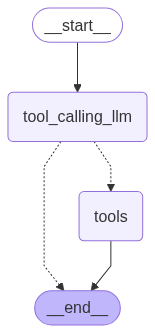

In [24]:
# node definition 
def tool_calling_llm(state: State):
    """Node to call the llm with tools."""
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build the state graph
builder = StateGraph(State)
builder.add_node(
    "tool_calling_llm",
    tool_calling_llm
)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm", 
    tools_condition
)
builder.add_edge("tools", END)

# Create the graph
graph = builder.compile()

# view
display(Image(graph.get_graph().draw_mermaid_png()))


In [25]:
messages = graph.invoke({"messages":"1706.03762"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_23dx)
 Call ID: call_23dx
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [26]:
messages = graph.invoke({"messages":"Hi, my name is nitish"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi, my name is nitish
================================== Ai Message ==================================

Hello Nitish! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊


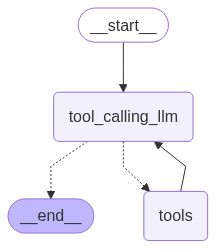

In [27]:
# node definition 
def tool_calling_llm(state: State):
    """Node to call the llm with tools."""
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build the state graph
builder = StateGraph(State)
builder.add_node(
    "tool_calling_llm",
    tool_calling_llm
)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm", 
    tools_condition
)
builder.add_edge("tools", "tool_calling_llm")

# Create the graph
graph = builder.compile()

# view
display(Image(graph.get_graph().draw_mermaid_png()))


In [28]:
messages = graph.invoke({"messages":"Hi, what is the recent news AI and pleae tell me recent research on quantum computing?"})
for m in messages["messages"]:
    m.pretty_print()

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<tool_call>\n{"name": "arxiv", "arguments": "{\\"query\\": \\"quantum computing\\"}"}\n</tool_call>'}}